# Reading the contents of an SLSPS simulation file

In [1]:
from SLSPS_Simulations import *
import matplotlib.pyplot as plt
%matplotlib inline

Read-in one SLSPS simulation file containing the results from one realization of the simulated "Optimized" survey version.

In [2]:
self = loadpickle('Simulations/SLSPS_Optimized')

Other survey versions include "Closest", "Large", "Short", "Degraded", and "Dark". For descriptions of these sruvey versions see Sect. 13 in Cloutier et al 2018 (link to paper). An SLSPS simulation file from single realization of each of these survey versions can be loaded from the corresponding file called

    Simulations/SLSPS_suffix
    
where "suffix" should be replaced with one of the aforementioned survey version names. I.e.

In [15]:
% ls ./Simulations

SLSPS_Closest    SLSPS_Degraded   SLSPS_Optimized
SLSPS_Dark       SLSPS_Large      SLSPS_Short


## Summary of available parameters

Descriptions of all stellar pararmeters and their units can be accessed via

In [16]:
self.descriptions_star, self.units_star

({'HZPlims': 'habitable zone orbital period limits',
  'I': 'stellar spin-axis inclination to the line-of-sight',
  'Jmag': 'J-band magnitude',
  'Ms': 'stellar mass',
  'Prot': 'rotation period',
  'Rs': 'stellar radius',
  'SpT': 'numerical spectral type',
  'Teff': 'effective temperature',
  'dist': 'distance',
  'fB': 'magnetic field strength',
  'vsini': 'projected rotation velocity'},
 {'HZPlims': 'days',
  'I': 'deg',
  'Jmag': '',
  'Ms': 'solar masses',
  'Prot': 'days',
  'Rs': 'solar radii',
  'SpT': '',
  'Teff': 'kelvin',
  'dist': 'parsecs',
  'fB': 'kiloGauss',
  'vsini': 'km/s'})

Similarly for the planetary system parameters

In [17]:
self.descriptions_planet, self.units_planet

({'HZ_flags': 'habitable zone flags',
  'Ks': 'RV semi-amplitudes',
  'Ps': 'orbital periods',
  'T0s': 'times of inferior conjuction',
  'albedos': 'geometric albedos',
  'contrasts': 'planet-star contrast',
  'detection_flags': 'SPIRou detection flags',
  'eccs': 'orbital eccentricities',
  'imagable_flags': 'potentially imagable planet flags',
  'incs': 'orbital inclinations to the plane of the sky',
  'mps': 'planetary masses',
  'mpsinis': 'minimum planetary masses',
  'nplanets': 'planet multiplicity',
  'nplanets_detected': 'number of planets detected in the system',
  'rps': 'planetary radii',
  'seps': 'projected separations',
  'smas': 'semi-major axes'},
 {'HZ_flags': 'binary flag',
  'Ks': 'm/s',
  'Ps': 'days',
  'T0s': 'BJD',
  'albedos': '',
  'contrasts': '',
  'detection_flags': 'binary flag',
  'eccs': '',
  'imagable_flags': 'binary flag',
  'incs': 'deg',
  'mps': 'Earth masses',
  'mpsinis': 'Earth masses',
  'nplanets': '',
  'nplanets_detected': '',
  'rps': 'Ear

And lastly for the remaining parameters which describe the properties of the simulated RV time-series 

In [69]:
self.descriptions_auxiliary, self.units_auxiliary

({'nobs': 'number of RV measurements',
  'sigmaRV': 'median RV measurement uncertainty'},
 {'nobs': '', 'sigmaRV': 'm/s'})

## Visualization examples

Below are a suite of simple plotting examples intended to demonstrate the data included in each SLSPS simulation file.

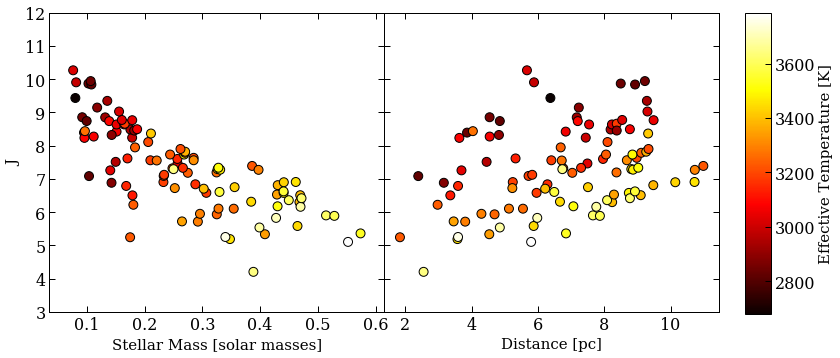

In [110]:
# plot stellar parameters from Fig 1 in Cloutier et al 2018
fig = plt.figure(figsize=(12,5.5))
ax1 = fig.add_subplot(121)
ax1.scatter(self.Ms, self.Jmag, c=self.Teff, s=80, cmap=plt.get_cmap('hot'), edgecolors='k')
ax1.set_xlabel('Stellar Mass [solar masses]'), ax1.set_ylabel('J'), ax1.set_ylim((3,12))

ax2 = fig.add_subplot(122)
im = ax2.scatter(self.dist, self.Jmag, c=self.Teff, s=80, cmap=plt.get_cmap('hot'), edgecolors='k')
cbar_ax = fig.add_axes([.93, .12, .03, .76])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Effective Temperature [K]')
ax2.set_xlabel('Distance [pc]'), ax2.set_yticklabels(''), ax2.set_ylim((3,12))
fig.subplots_adjust(wspace=0)

((0, 200.0),
 <matplotlib.text.Text at 0x11a906350>)

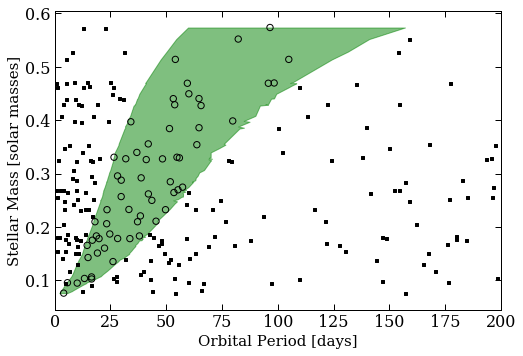

In [111]:
# plot the stellar HZ limits and planet population
fig = plt.figure(figsize=(8,5.5))
ax = fig.add_subplot(111)
sort = np.argsort(self.Ms)
ax.fill_betweenx(self.Ms[sort], self.HZPlims[sort,0], self.HZPlims[sort,1], color='g', alpha=.5)
inHZ = self.HZ_flags == 1
ax.scatter(self.Ps[inHZ], np.repeat(self.Ms, self.Ps.shape[1]).reshape(self.Nstar, self.Ps.shape[1])[inHZ], 
           facecolors='none', edgecolor='k', s=40)
outHZ = self.HZ_flags == 0
ax.scatter(self.Ps[outHZ], np.repeat(self.Ms, self.Ps.shape[1]).reshape(self.Nstar, self.Ps.shape[1])[outHZ], 
           c='k', s=9, marker='s')
ax.set_xlim((0,2e2)), ax.set_xlabel('Orbital Period [days]'), ax.set_ylabel('Stellar Mass [solar masses]')

/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater_equal
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


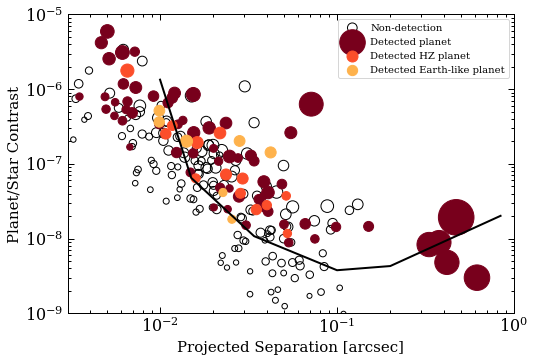

In [127]:
# planet population compared to the predicted contrast curve from EPICS/PFI (Fig 19 in Cloutier et al 2018)
fig = plt.figure(figsize=(8,5.5))
ax = fig.add_subplot(111)
g = self.detection_flags == 0
ax.scatter(self.seps[g], self.contrasts[g], facecolor='none', edgecolors='k', s=self.rps[g]*50, label='Non-detection')
g = (self.detection_flags == 1) & (self.HZ_flags == 0)
ax.scatter(self.seps[g], self.contrasts[g], c='#78001c', s=self.rps[g]*50, label='Detected planet')
g = (self.detection_flags == 1) & (self.HZ_flags == 1) & ((self.mps < 1) | (self.mps > 5))
ax.scatter(self.seps[g], self.contrasts[g], c='#fc4e2a', s=self.rps[g]*50, label='Detected HZ planet')
g = (self.detection_flags == 1) & (self.HZ_flags == 1) & (self.mps >= 1) & (self.mps <= 5)
ax.scatter(self.seps[g], self.contrasts[g], c='#feb24c', s=self.rps[g]*50, label='Detected Earth-like planet')
ax.plot([.01,.015,.034,.1,.2,.84], [1.34e-6,6.50e-8,1.08e-8,3.78e-9,4.30e-9,2.02e-8], 'k-')
ax.set_xlim((3e-3, 1)), ax.set_ylim((1e-9, 1e-5))
ax.set_xscale('log'), ax.set_yscale('log')
ax.set_xlabel('Projected Separation [arcsec]'), ax.set_ylabel('Planet/Star Contrast')
ax.legend(loc='upper right')